In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
from math import e

In [0]:
class linear_regression(object):

    def fit(self,x_train,y_train):                                              #training the model using default values of no. of iterations,learning rate,without regularisation
        x = np.array(x_train)
        m = np.size(x,axis = 0)
        n = np.size(x,axis = 1)
        X = np.zeros((m,n))
        for a in range(n):                                                      #normalising the data
            X[:,a] = (x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
        X = np.hstack((np.ones((m,1)),X))
        y = np.array(y_train).reshape(m,1)   
        self.theta = np.zeros((n+1,1))                                          #initialsing theta matrix
        hypothesis = np.dot(X,self.theta)                                       #computing the hypothesis function
        cost_func = (((hypothesis-y)**2).sum())/(m*2)                           #defining the cost function
        alpha = 0.0001                                                          #setting a default learning rate of 0.0001
        self.iter_count = 0
        self.l=[]
        self.p=[]
        while self.iter_count<7000:                                             #performing gradient descent step for a default value of 7000 iterations
            self.theta = self.theta - (alpha/m)*(np.dot(X.T,(hypothesis-y)))    #updating the values of the theta matrix
            hypothesis = np.dot(X,self.theta)
            cost_func = (((hypothesis-y)**2).sum())/(m*2)
            self.l.append(cost_func)
            self.p.append(self.iter_count)
            self.iter_count+=1

    def train(self,x_train,y_train,iter,alpha,lamda):                           #training the model using input values of iterations,learning rate and regularisation parameter
        x = np.array(x_train)
        m = np.size(x,axis = 0)
        n = np.size(x,axis = 1)
        X = np.zeros((m,n))
        for a in range(n):                                                      #normalising the data
            X[:,a] = (x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
        X = np.hstack((np.ones((m,1)),X))
        y = np.array(y_train).reshape(m,1)   
        self.theta = np.zeros((n+1,1))                                          #initialising theta matrix
        hypothesis = np.dot(X,self.theta)                                       #computing the hypothesis function
        cost_func = (((hypothesis-y)**2).sum()+np.sum(self.theta[1:]**2)*lamda)/(m*2)   #cost function considering regularisation            
        for a in range(iter):                                                   #performing gradient descent over input given iterations
          theta1 = np.zeros((n+1,1))
          theta1[1:] = self.theta[1:]
          hypothesis = np.dot(X,self.theta)
          cost_func = (((hypothesis-y)**2).sum()+np.sum(self.theta[1:]**2)*lamda)/(m*2)
          self.theta = self.theta - (alpha/m)*(np.dot(X.T,(hypothesis-y))-lamda*theta1)  #updating theta using gradient of theta and also regularistaion parameter
 
          
    def get_params(self):                                                       #returns the weights(theta)
        return self.theta

    def predict(self,x_test):                                                   #predicting the value of y using the trained model
        x = np.array(x_test)
        m = np.size(x,axis = 0)
        n = np.size(x,axis = 1)
        X = np.zeros((m,n))
        for a in range(n):                                                      #normalising the data
            X[:,a] = (x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)   
        X = np.hstack((np.ones((m,1)),X))
        prediction = np.dot(X,self.theta)                                       #predicting the output using the theta matrix
        return prediction

    def score(self,y_pred,y_test):                                              #calculating the score of the prediction made by the model
        self.y_test = np.array(y_test)
        u = ((self.y_test.reshape((y_test.shape[0],1))-y_pred**2)).sum()        
        v = np.sum((y_test-self.y_test.mean())**2)
        return 1-u/v

    def split_train_test(self,X,y,split):                                       #splits the data into training set and testing set based on input split fraction
        m = size()
        n = split*np.size(y,axis=0)
        x_train = X[0:n,:]
        x_test = X[n:,:]
        y_train = y[0:n]
        y_test = y[n:]
        return x_train,x_test,y_train,y_test

    def plot(self):                                                             #plots the cost function Vs the no. of iterations
        plt.plot(self.p,self.l)

In [0]:
def accuracy(prediction,y_test):
        y = np.array(y_test)
        f=0
        m = np.size(y_test,axis=0)
        for k in np.arange(-1,1,0.1):
          acc=0
          for b in range(m):
            if prediction[b]<0+k:
                prediction[b]=0
            elif prediction[b]<1+k:
                prediction[b]=1
            elif prediction[b]<2+k:
                prediction[b]=2
            elif prediction[b]<3+k:
                prediction[b]=3
            elif prediction[b]<4+k:
                prediction[b]=4
            elif prediction[b]<5+k:
                prediction[b]=5
            elif prediction[b]<6+k:
                prediction[b]=6
            elif prediction[b]<7+k:
                prediction[b]=7
            elif prediction[b]<8+k:
                prediction[b]=8
            else:
                prediction[b]=9
            if prediction[b]==y[b]:
                acc+=1
          z = (acc*100)/m
          if z>f:
            f=z
        return f   

In [0]:
df1 = pd.read_csv("sample_data/mnist_train_small.csv",header = None)

In [0]:

df2 = pd.read_csv("sample_data/mnist_test.csv",header = None)

In [0]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = df1[0]

In [0]:

y_test = df2[0]
np.size(y_test,axis=0)

10000

In [0]:
x_train = df1.drop(0,axis = 1,inplace = False)
x_train.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010800,0.010800,0.00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012400,0.028450,0.058300,0.065500,0.127550,0.192350,...,3.713850,2.627100,1.718400,1.020050,0.553200,0.247400,0.097750,0.020750,0.00140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010650,0.036050,0.088300,0.112300,0.158500,0.276900,0.406050,0.546800,0.572050,0.696200,0.671650,0.54590,0.36630,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070711,1.527351,1.527351,0.06364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233338,1.986539,3.473241,3.100708,5.002952,5.989244,...,26.814446,22.334028,18.262349,14.000437,10.463161,6.750598,4.079011,1.322084,0.19799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049497,1.095078,2.220765,3.900047,4.749833,5.406638,7.005125,8.718932,10.378882,10.254588,11.457106,11.296983,10.05708,8.25534,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:

x_test = df2.drop(0,axis = 1,inplace = False)
x_test.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0038,0.0236,0.0158,0.040300,0.051100,0.104700,0.234300,...,3.798100,2.634600,1.410300,0.895600,0.551000,0.289100,0.115100,0.05000,0.002700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002200,0.043500,0.088800,0.133200,0.160000,0.184300,0.3123,0.453400,0.558300,0.574600,0.458200,0.274100,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3800,2.3600,1.5800,2.884113,2.699336,4.516213,6.495508,...,27.290079,22.163799,16.149589,12.790765,10.191182,7.523203,4.333536,3.08954,0.225605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165523,2.719218,4.285178,4.989063,5.620156,5.372897,7.6112,9.274601,10.181816,10.410152,9.750024,7.050811,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
model = linear_regression()

In [0]:
model.fit(x_train,y_train)

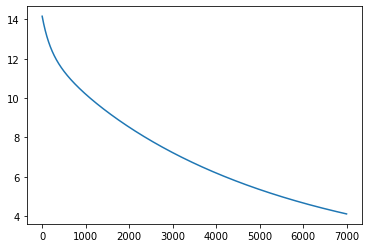

In [0]:

model.plot()

In [0]:
y_pred = model.predict(x_train)
accuracy(y_pred,y_train)

25.43

In [0]:
y_pred = model.predict(x_test)
accuracy(y_pred,y_test)

25.66

In [0]:
model.train(x_train,y_train,6000,0.0001,0.01)

In [0]:
y_pred = model.predict(x_train)
accuracy(y_pred,y_train)

25.53

In [0]:
y_pred = model.predict(x_test)
accuracy(y_pred,y_test)

26.13

In [0]:
 from sklearn.linear_model import LinearRegression

In [0]:
model1 = LinearRegression()

In [0]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model1.score(x_test,y_test)

-7.196933209398084e+17